# Data Exploration: Fruits Dataset

This notebook visually explores input data for a classification problem using statistical summaries and plots.



## 1. Load Libraries and Dataset

* Overview of the fruits dataset
* Source and description of the dataset
* Objective: Exploring data

### Data

The "fruits" dataset was created by Dr. Iain Murray from University of Edinburgh. He bought a few dozen oranges, lemons and apples of different varieties, and recorded their measurements in a table. Then the professors at the University of Michigan formatted the fruits data, which is available in **Dataset/fruit_data_with_colors.txt**, along with this notebook, or it can be downloaded from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/fruit_data_with_colors.txt.

Let’s have a look the first a few rows of the data.

In [2]:
# For Google Colab
from google.colab import drive
drive.mount('/content/drive')
path = r"C:\Users\csanchez\Downloads" # Change this path to your needs accordingly.

ModuleNotFoundError: No module named 'google'

### Import Necessary Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [5]:
fruits = pd.read_csv(r'C:\Users\csanchez\Downloads\fruit_data_with_colors.txt', sep='\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


## 2. Data Overview

### Basic Information

In [6]:
fruits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


### Check for Missing Values

In [7]:
fruits.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

### Dataset Shape

In [8]:
print(fruits.shape) #dataframe dimension

(59, 7)


Each row in the dataset represents a single fruit sample, characterized by multiple features across the table's columns.

The dataset contains 59 fruit samples, each defined by 7 features.

## 3. Class Distribution

### Check Unique Classes

We have four types of fruits in the dataset:

In [9]:
print(fruits['fruit_name'].unique())

['apple' 'mandarin' 'orange' 'lemon']


### Count Per Class

Now, let's see how many samples we have for each type of fruit.

In [10]:
print(fruits.groupby('fruit_name').size())

fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


The dataset is fairly balanced except for mandarins, which have significantly fewer samples.

How can we consider this situation: balanced or unbalanced?

### Class Distribution Visualization

Bar plot and Box plot for each numeric variable will give us a clearer idea of the **distribution** of the input variables:

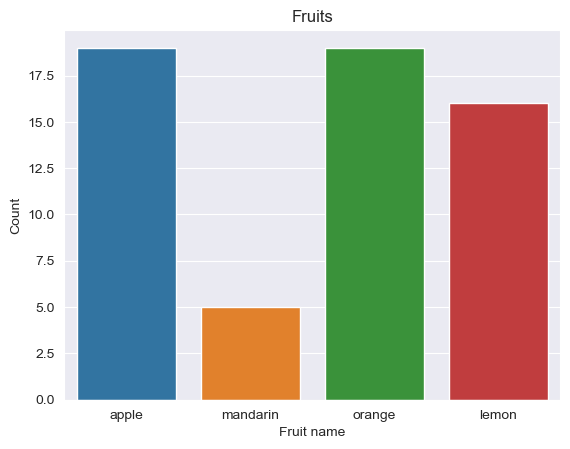

In [11]:
#classes bar plot (Balanced number of classes)
ax= sns.countplot(x=fruits['fruit_name'])
ax.set_xlabel("Fruit name")
ax.set_ylabel("Count")
ax.set_xticklabels(fruits['fruit_name'].unique()) #We could change manually x category labels
ax.set_title("Fruits")
plt.show()

## 4. Statistical Summary

### Basic Statistics

In [12]:
fruits.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


### Mean, Median, and Mode for Mass

In [41]:
print("Mean:", fruits["mass"].mean())
print("Median:", fruits["mass"].median())
print("Mode:", fruits["mass"].mode()[0])

Mean: 163.11864406779662
Median: 158.0
Mode: 116


## 5. Visualizing Feature Distributions

### Boxplots for Numerical Features

In [1]:
#variable boxplot: see in https://www.simplypsychology.org/boxplots.html
fruits.drop('fruit_label', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9),
                                        title='Box Plot for each input variable')
plt.savefig('fruits_box')
plt.show()

NameError: name 'fruits' is not defined

Insight:

* Some features show outliers.

* "color_score" appears to follow a nearly normal distribution.

## Histograms of Features

Now we can see the distribution with a histogram for each input variable

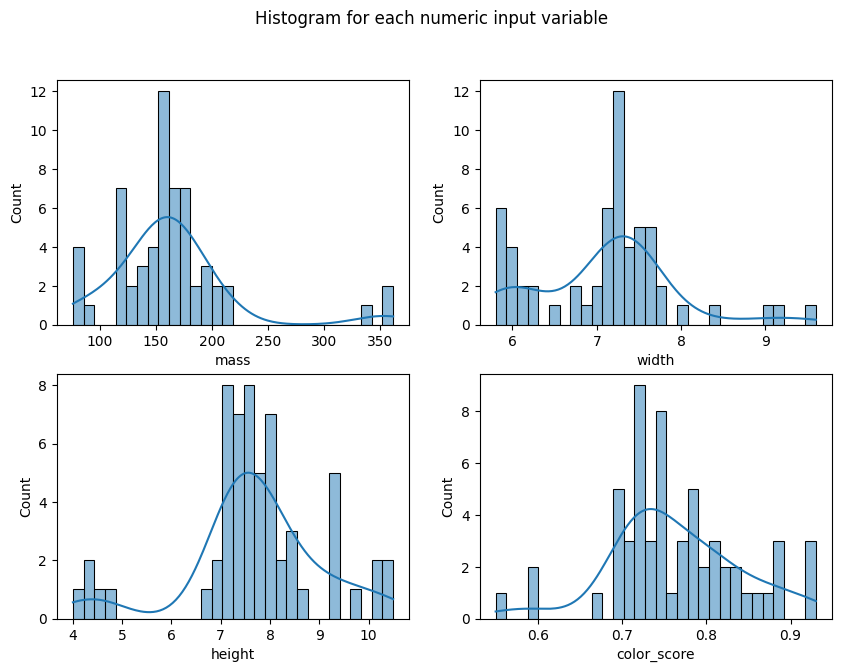

In [43]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.ravel()
for i, var in enumerate(['mass', 'width', 'height', 'color_score']):
    sns.histplot(data=fruits, x=var, ax=axs[i], kde=True,bins=30)


plt.suptitle("Histogram for each numeric input variable")
plt.savefig('fruits_hist')


**Insight**:

* Mass and width appear to be normally distributed.

* Color_score has a peak near 0.7.

## 6. Feature Correlations

Now we can look at the correlation between the variables, for this purpose, we can make a scatter matrix.

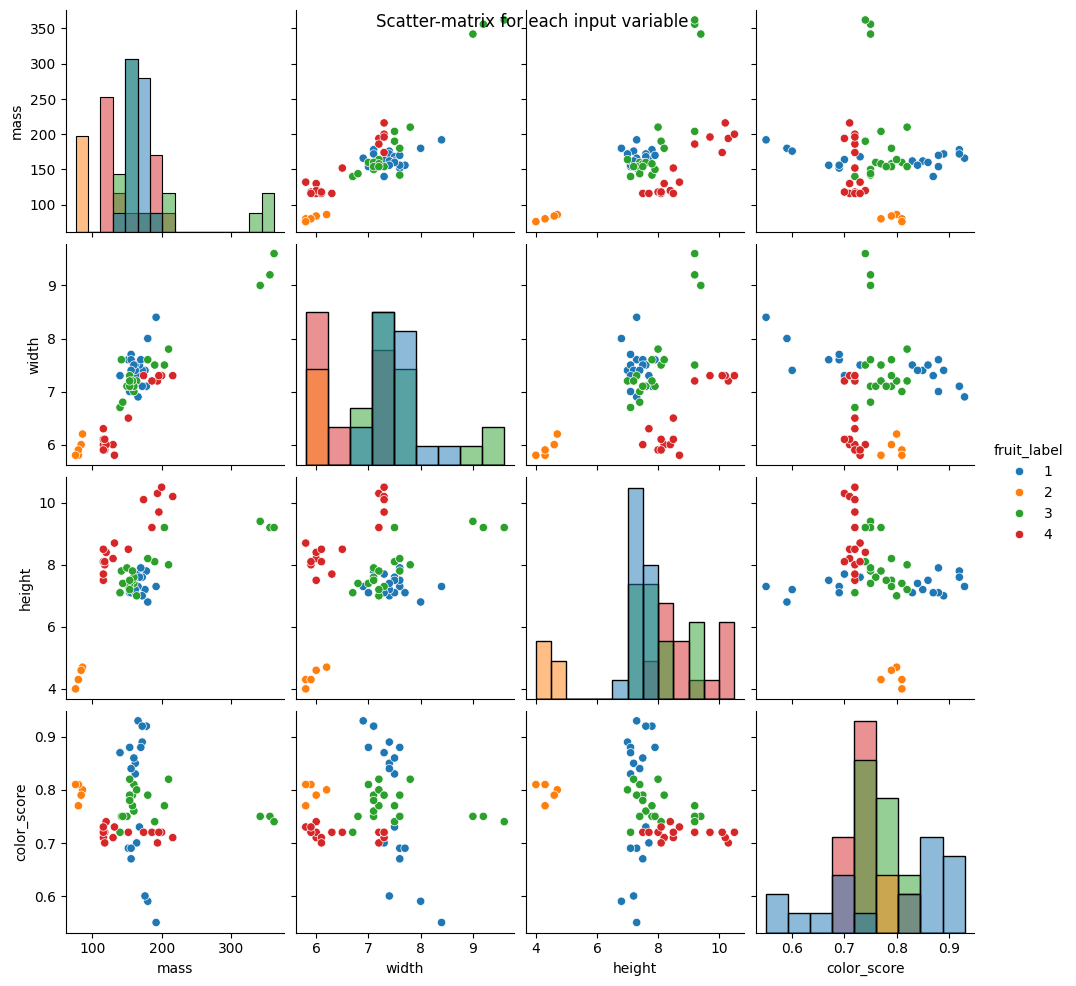

In [44]:
sns.pairplot(fruits, hue='fruit_label',diag_kind="hist",palette="tab10")
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

**Insight**:

* **Mass and width are highly correlated**, which might introduce redundancy in the model.

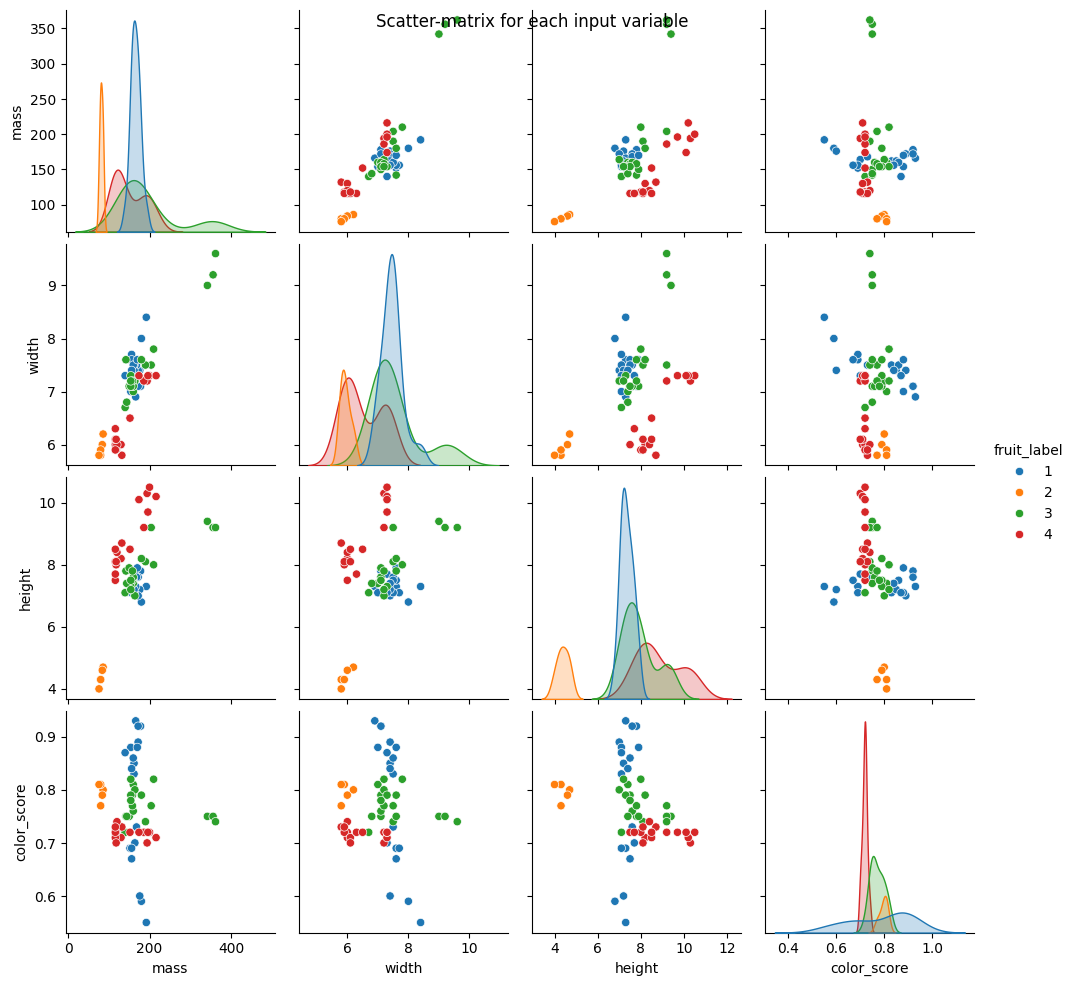

In [45]:
sns.pairplot(fruits, hue='fruit_label',palette='tab10')
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix2')

Some pairs of attributes are correlated (mass and width). This suggests a high correlation and a predictable relationship.

## Summary of the Learned Topics in Data Exploration

1. **Data Handling & Preparation**
* Loading a dataset using **pandas**
* Checking for **missing values** and dataset **shape**
* Understanding dataset structure with `.info()` and `.describe()`

2. **Exploratory Data Analysis (EDA)**
* Analyzing **class distribution** using .value_counts() and bar plots
* Generating **statistical summaries** (mean, median, mode)
* Assessing whether the dataset is **balanced or imbalanced**

3. **Data Visualization**
* **Count plots** to visualize class distributions
* **Boxplots** to detect outliers
* **Histograms** to check feature distributions
* **Scatter matrices & pair plots** to examine relationships between features

4. **Feature Correlation & Interpretation**
* Using **correlation heatmaps** to identify relationships between numerical features
* Detecting **redundant features** based on correlation analysis
* Understanding how features contribute to class differentiation